#TIME SERIES

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/exchange_rate.csv")
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


<Axes: >

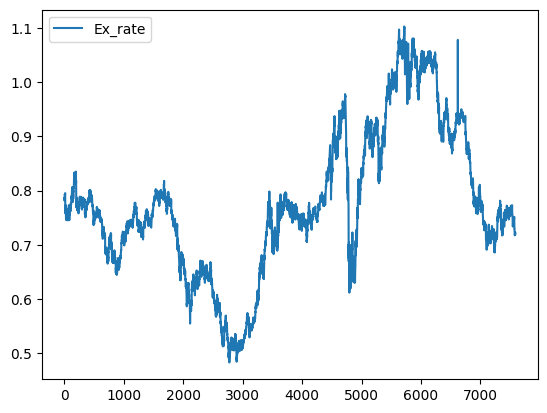

In [2]:
df.plot()

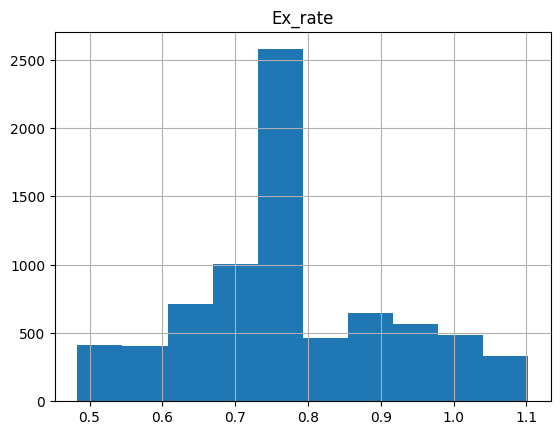

In [4]:
import matplotlib.pyplot as plt
df.hist()
plt.show()

In [5]:
df["Ex_rate"].skew()

np.float64(0.2611267376737365)

In [6]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


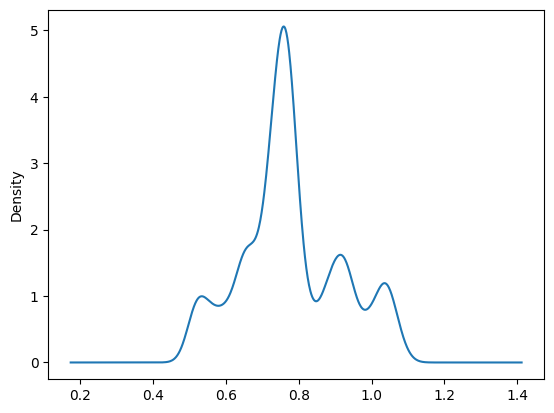

In [7]:
df['Ex_rate'].plot(kind='kde')
plt.show()

In [9]:
#extract year from date column
df['year']=pd.DatetimeIndex(df['date']).year
df

,date,Ex_rate,year
0,01-01-1990 00:00,0.785500,1990
1,02-01-1990 00:00,0.781800,1990
2,03-01-1990 00:00,0.786700,1990
3,04-01-1990 00:00,0.786000,1990
4,05-01-1990 00:00,0.784900,1990
...,...,...,...
7583,06-10-2010 00:00,0.718494,2010
7584,07-10-2010 00:00,0.721839,2010
7585,08-10-2010 00:00,0.723197,2010
7586,09-10-2010 00:00,0.720825,2010


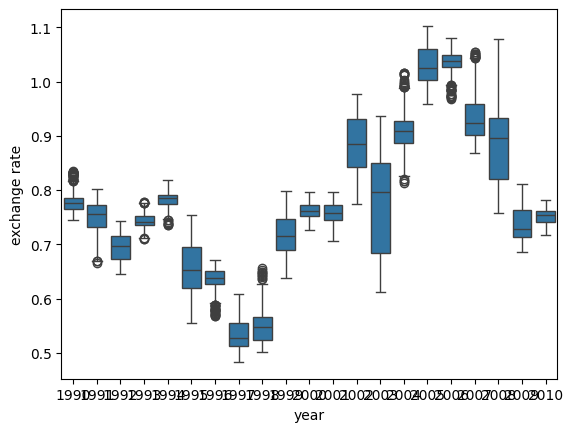

In [10]:
#create a box plot using seaborn
import seaborn as sns
sns.boxplot(x='year',y='Ex_rate',data=df)
plt.xlabel('year')
plt.ylabel('exchange rate')
plt.show()

In [11]:
#extract month from date column
df['month']=pd.DatetimeIndex(df['date']).month
df

,date,Ex_rate,year,month
0,01-01-1990 00:00,0.785500,1990,1
1,02-01-1990 00:00,0.781800,1990,2
2,03-01-1990 00:00,0.786700,1990,3
3,04-01-1990 00:00,0.786000,1990,4
4,05-01-1990 00:00,0.784900,1990,5
...,...,...,...,...
7583,06-10-2010 00:00,0.718494,2010,6
7584,07-10-2010 00:00,0.721839,2010,7
7585,08-10-2010 00:00,0.723197,2010,8
7586,09-10-2010 00:00,0.720825,2010,9


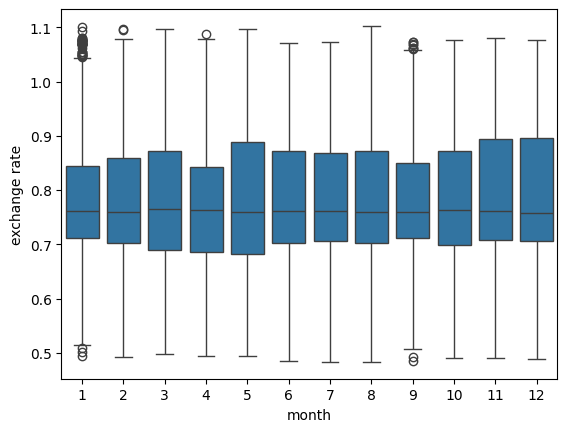

In [12]:
sns.boxplot(x='month',y='Ex_rate',data=df)
plt.xlabel('month')
plt.ylabel('exchange rate')
plt.show()

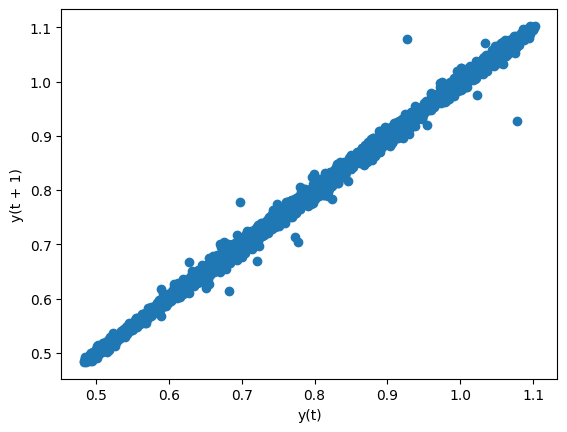

In [13]:
#lagplot
from pandas.plotting import lag_plot
lag_plot(df['Ex_rate'])
plt.show()

<Figure size 4000x1000 with 0 Axes>

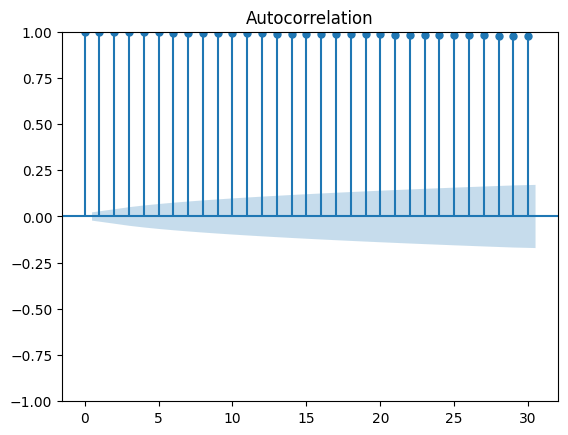

In [15]:
#autocorrelation
import matplotlib.pyplot as plt
plt.figure(figsize = (40,10))
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df["Ex_rate"],lags=30)
plt.show()

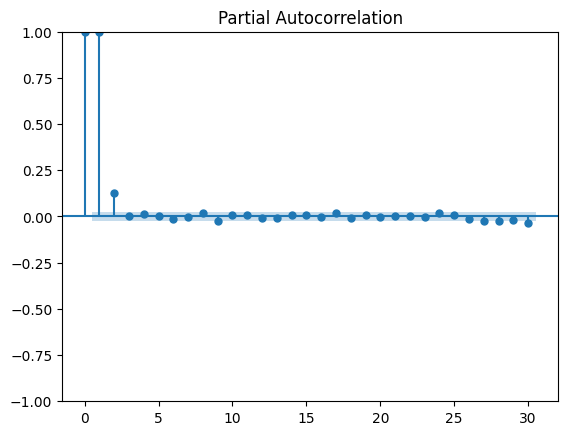

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df["Ex_rate"],lags=30)
plt.show()

#ARIMA Model

In [57]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df['Ex_rate'],order=(1,1,1))
model_fit=model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Mon, 06 Oct 2025   AIC                         -56102.322
Time:                        13:28:43   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

In [58]:
model_fit.resid

,0
0,0.785500
1,-0.003700
2,0.004414
3,-0.000058
4,-0.001189
...,...
7583,-0.000343
7584,0.003317
7585,0.001797
7586,-0.002192


In [59]:
# Get the predicted values
predicted_values = model_fit.predict()

# Display actual and predicted values
comparison_df = pd.DataFrame({'Actual': df['Ex_rate'], 'Predicted': predicted_values})
print(comparison_df.head())

   Actual  Predicted
0  0.7855   0.000000
1  0.7818   0.785500
2  0.7867   0.782286
3  0.7860   0.786058
4  0.7849   0.786089


In [60]:
forecast=model_fit.forecast(steps=300)
print("Fitted Values:",model_fit.fittedvalues)
print("Forecast:",forecast)

Fitted Values: 0       0.000000
1       0.785500
2       0.782286
3       0.786058
4       0.786089
          ...   
7583    0.718837
7584    0.718522
7585    0.721400
7586    0.723017
7587    0.721136
Length: 7588, dtype: float64
Forecast: 7588    0.720826
7589    0.720826
7590    0.720826
7591    0.720826
7592    0.720826
          ...   
7883    0.720826
7884    0.720826
7885    0.720826
7886    0.720826
7887    0.720826
Name: predicted_mean, Length: 300, dtype: float64


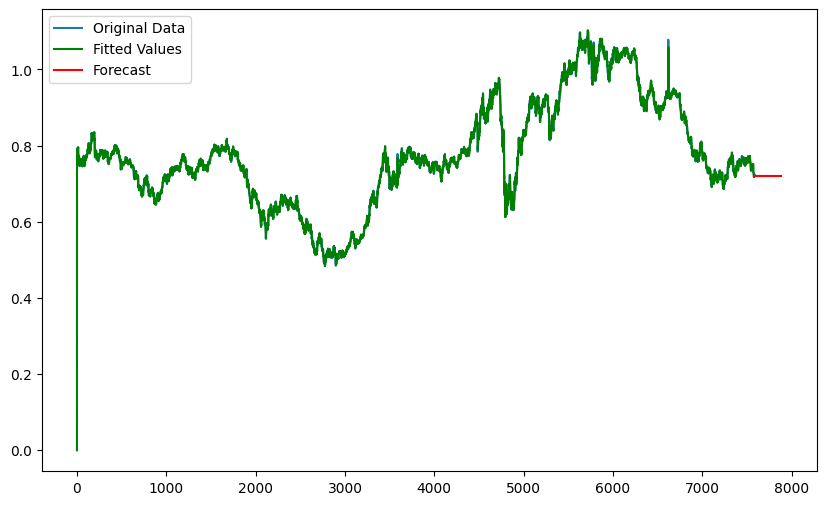

In [61]:
#Plotting the original data and the fitted/forecasted values
plt.figure(figsize=(10,6))
plt.plot(df['Ex_rate'],label='Original Data')
plt.plot(model_fit.fittedvalues,label='Fitted Values',color='green')
plt.plot(range(len(df),len(df)+300),forecast,label='Forecast',color='red')
plt.legend()
plt.show()

In [24]:
#rmse
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(df['Ex_rate'],predicted_values))
print(rmse)

0.010828926684709568


In [25]:
p_values = [0, 1, 2]
d_values = [0, 1]
q_values = [0, 1, 2]

In [26]:
results = []
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            try:
                model = ARIMA(df['Ex_rate'], order=order)
                model_fit = model.fit()
                predicted_values = model_fit.predict()
                rmse = np.sqrt(mean_squared_error(df['Ex_rate'], predicted_values))
                results.append((order, rmse))
            except Exception as e:
                print(f"Failed to fit ARIMA model for order {order}: {e}")

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [27]:
best_rmse = float('inf')
best_order = None

for order, rmse in results:
    if rmse < best_rmse:
        best_rmse = rmse
        best_order = order

print(f"Best ARIMA order: {best_order}")
print(f"Lowest RMSE: {best_rmse}")

Best ARIMA order: (2, 0, 2)
Lowest RMSE: 0.005995198795303942


#Exponential Smoothing Techniques

In [29]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [35]:
#simple exponential
SEP=SimpleExpSmoothing(df['Ex_rate'])
model_fit=SEP.fit(optimized=True)
print(model_fit.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:             SimpleExpSmoothing   SSE                              0.273
Optimized:                       True   AIC                         -77644.985
Trend:                           None   BIC                         -77631.116
Seasonal:                        None   AICC                        -77644.980
Seasonal Periods:                None   Date:                 Mon, 06 Oct 2025
Box-Cox:                        False   Time:                         13:16:12
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8698462                alpha                 True
initial_level              0.7855000                

In [36]:
model_fit.resid

,0
0,0.000000
1,-0.003700
2,0.004418
3,-0.000125
4,-0.001116
...,...
7583,-0.000331
7584,0.003302
7585,0.001788
7586,-0.002139


In [37]:
rmse=np.sqrt(mean_squared_error(df['Ex_rate'],model_fit.fittedvalues))
print(rmse)

0.005996587930402808


In [46]:
#forecast for next step
forecast=model_fit.forecast(steps=300)
print("Fitted Values:",model_fit.fittedvalues)
print("Forecast:",forecast)

Fitted Values: 0       0.785500
1       0.785500
2       0.782282
3       0.786125
4       0.786016
          ...   
7583    0.718825
7584    0.718537
7585    0.721409
7586    0.722964
7587    0.721103
Length: 7588, dtype: float64
Forecast: 7588    0.720861
7589    0.720861
7590    0.720861
7591    0.720861
7592    0.720861
          ...   
7883    0.720861
7884    0.720861
7885    0.720861
7886    0.720861
7887    0.720861
Length: 300, dtype: float64


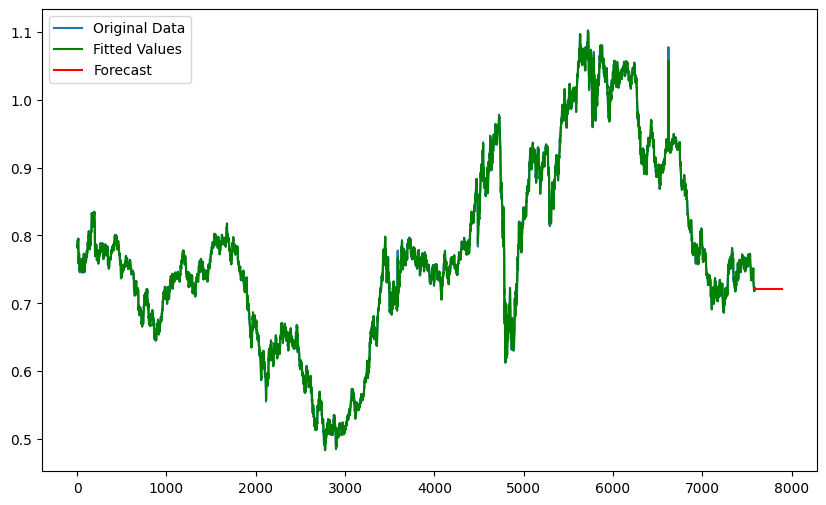

In [47]:
# Plotting the original data and the fitted/forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Original Data')
plt.plot(model_fit.fittedvalues, label='Fitted Values', color='green')
plt.plot(range(len(df), len(df) + 300), forecast, label='Forecast', color='red')
plt.legend()
plt.show()

In [48]:
# Holt's Linear Trend Model
HLT = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal=None)
model_fit = HLT.fit(optimized=True)

rmse  = np.sqrt(np.mean(model_fit.resid**2))
print("RMSE",np.round(rmse,2))

RMSE 0.01


In [49]:
forecast = model_fit.forecast(steps=300)

# Print the results
print("Fitted Values:", model_fit.fittedvalues)
print("Forecasted Values:", forecast)

Fitted Values: 0       0.785500
1       0.785500
2       0.782282
3       0.786125
4       0.786016
          ...   
7583    0.718825
7584    0.718537
7585    0.721409
7586    0.722964
7587    0.721103
Length: 7588, dtype: float64
Forecasted Values: 7588    0.720861
7589    0.720861
7590    0.720861
7591    0.720861
7592    0.720861
          ...   
7883    0.720861
7884    0.720861
7885    0.720861
7886    0.720861
7887    0.720861
Length: 300, dtype: float64


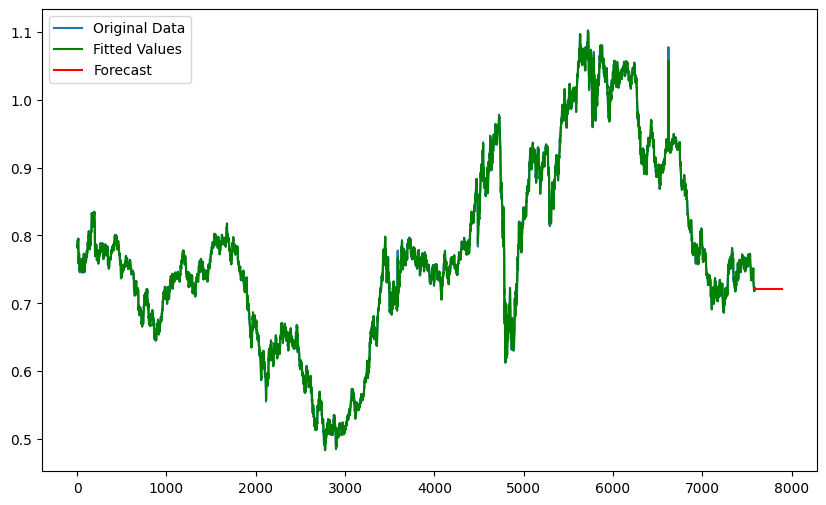

In [50]:
# Plotting the original data and the fitted/forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Original Data')
plt.plot(model_fit.fittedvalues, label='Fitted Values', color='green')
plt.plot(range(len(df), len(df) + 300), forecast, label='Forecast', color='red')
plt.legend()
plt.show()

In [52]:
# Holt-Winters Seasonal Model
HWS = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal='add', seasonal_periods=6)
model_fit = HWS.fit(optimized=True) # smoothing_level,smoothing_slope,smoothing_seasonal are tuning parameters

rmse  = np.sqrt(np.mean(model_fit.resid**2))
print("RMSE",np.round(rmse,2))

RMSE 0.01


In [53]:
forecast = model_fit.forecast(steps=300)

# Print the results
print("Fitted Values:", model_fit.fittedvalues)
print("Forecasted Values:", forecast)

Fitted Values: 0       0.786105
1       0.786163
2       0.781930
3       0.785793
4       0.785730
          ...   
7583    0.718241
7584    0.718675
7585    0.721635
7586    0.723928
7587    0.720868
Length: 7588, dtype: float64
Forecasted Values: 7588    0.720318
7589    0.719818
7590    0.720063
7591    0.720191
7592    0.721038
          ...   
7883    0.717081
7884    0.717326
7885    0.717454
7886    0.718301
7887    0.718037
Length: 300, dtype: float64


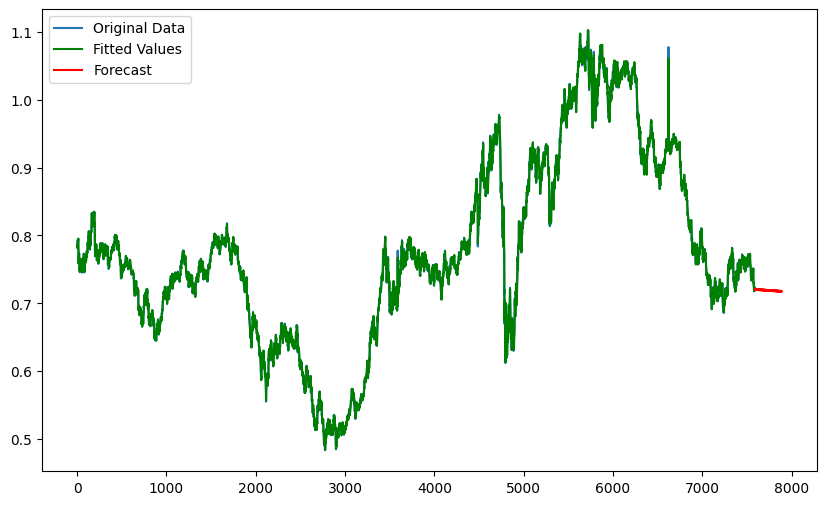

In [54]:
# Plotting the original data and the fitted/forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Original Data')
plt.plot(model_fit.fittedvalues, label='Fitted Values', color='green')
plt.plot(range(len(df), len(df) + 300), forecast, label='Forecast', color='red')
plt.legend()
plt.show()

#Comparison and Conclusion:

* Comparing the RMSE values both the ARIMA with order (2,0,2) and SES model achieved the lowest RMSE but however looking at the plots Holt's linear method has captured better than the other models model the original and fitted data and also the forecasted data. If we are considering lowest RMSE to be the selection criteria of selecting the best model then we can go for either ARIMA with order (2,0,2) or Single Exponential Smoothing model or if we are considering the plotted values then we can select the Holt's linear method.